# Домашняя работа "Оценка точности модели, переобучение, регуляризация"

Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score

In [3]:
data = pd.read_csv('/Users/glebmutovin/Data_Science/DataScience_Netology/Machine_learning/Theme_4/Additional_materials/athletes.csv')

In [4]:
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [5]:
data = data[pd.isnull(data['height']) == 0]
data = data[pd.isnull(data['weight']) == 0]

In [6]:
featured_columns = [i for i in data.columns if i != 'sex']
X = data[featured_columns]

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [8]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]

In [9]:
le.fit(data['sex'])

LabelEncoder()

In [10]:
Y = pd.Series(le.transform(data['sex']))

In [11]:
model = LogisticRegression()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [13]:
model.fit(X_train, y_train)

LogisticRegression()

# ROC AUC

In [14]:
from sklearn.metrics import roc_curve

In [27]:
predictions = model.predict_proba( X_test )
fpr_, tpr_, thres = roc_curve( y_test, predictions[:, 1])

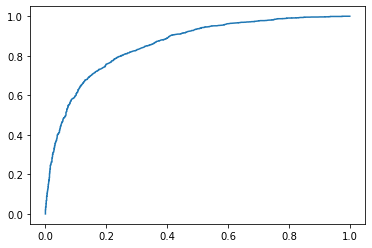

In [28]:
plt.plot( fpr_, tpr_ )

In [18]:
# ROC AUC вручную 

total_tpr = []
total_fpr = []

for i in thres:
    predictions = model.predict_proba( X_test )
    
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for predicted_proba, actual in zip(predictions[:, 1], y_test):
        if predicted_proba >= i:
            predicted = 1
        else:
            predicted = 0
        
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
            
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    
    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)
    
    total_tpr.append(tpr)
    total_fpr.append(fpr)


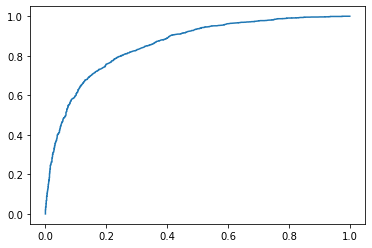

In [19]:
plt.plot(total_fpr, total_tpr)

In [33]:
# Еще один способ
tpr = []
fpr = []

for thresh in np.arange(1, 0, -0.05):
    
    tp = 0 
    fp = 0 
    fn = 0 
    tn = 0 

    for predicted_prob, actual in zip( predictions[:, 1], y_test ):    

        if predicted_prob >= thresh:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:

            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    
    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))

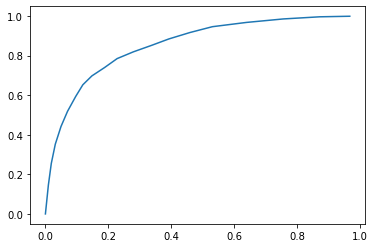

In [34]:
plt.plot( fpr, tpr )

In [35]:
roc_auc_score(y_test, predictions[:, 1])

0.8567671186728743

# Precision-Recall

In [21]:
from sklearn.metrics import precision_recall_curve

In [22]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

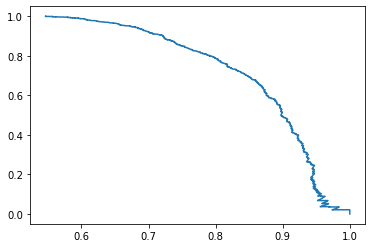

In [24]:
plt.plot(pr, re)

In [25]:
from sklearn.metrics import average_precision_score

In [26]:
average_precision_score( y_test, predictions[:, 1] )

0.8686349775623402